# ***A different approach***

Lets try some different things:

In [13]:
import pandas as pd
import numpy as np

In [15]:
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [86]:
data = pd.read_csv("DATA/train.csv")
data.drop(columns=["id","x","y","z"], inplace=True)

In [87]:
cutval = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
data.cut = data.cut.apply(lambda x: cutval[x])

In [88]:
clarval = {"FL":12, "IF":11, "VVS1":10, "VVS2":9, "VS1":8, "VS2":7, "SI1":6, "SI2":5, "SI3":4, "I1":3, "I2":2, "I3":1}
data.clarity = data.clarity.apply(lambda x: clarval[x])

In [89]:
colval = {"D":100, "E":93, "F":85, "G":77, "H":66, "I":53, "J":44}
data.color = data.color.apply(lambda x: colval[x])

In [90]:
data["price_per_carat"]=data.price/data.carat

In [91]:
data["quality"]=data.price_per_carat/data.color

In [94]:
data.groupby(data.color).mean()

,carat,cut,clarity,depth,table,price,price_per_carat,quality
color,,,,,,,,
44,1.167244,3.724870,6.778197,61.883341,57.790703,5351.783388,3843.432570,87.350740
53,1.023016,3.873309,6.957442,61.863715,57.529348,5067.355474,3991.116308,75.304081
66,0.912849,3.882353,6.924916,61.822238,57.512036,4509.820341,4014.344707,60.823405
77,0.770288,3.992552,7.446625,61.748457,57.297754,3991.139615,4162.057593,54.052696
85,0.739536,3.880820,7.104265,61.691539,57.436841,3743.005576,4144.550780,48.759421
93,0.656752,3.888783,6.966104,61.660958,57.481786,3066.200245,3798.409096,40.843109
100,0.656597,3.930464,6.692369,61.685834,57.394501,3185.161387,3964.557515,39.645575


In [54]:
data.corr()

,carat,cut,color,clarity,depth,table,price,price_per_carat,quality
carat,1.000000,-0.134463,-0.300595,-0.354329,0.025563,0.181437,0.921128,0.770313,0.853563
cut,-0.134463,1.000000,0.023494,0.194443,-0.219509,-0.433241,-0.052115,0.007646,-0.004493
color,-0.300595,0.023494,1.000000,-0.009964,-0.050107,-0.027176,-0.173896,-0.007121,-0.430686
clarity,-0.354329,0.194443,-0.009964,1.000000,-0.075435,-0.156728,-0.142408,0.049225,0.018802
depth,0.025563,-0.219509,-0.050107,-0.075435,1.000000,-0.297741,-0.015052,-0.041113,-0.020715
table,0.181437,-0.433241,-0.027176,-0.156728,-0.297741,1.000000,0.127691,0.086086,0.097771
price,0.921128,-0.052115,-0.173896,-0.142408,-0.015052,0.127691,1.000000,0.913220,0.905530
price_per_carat,0.770313,0.007646,-0.007121,0.049225,-0.041113,0.086086,0.913220,1.000000,0.876288
quality,0.853563,-0.004493,-0.430686,0.018802,-0.020715,0.097771,0.905530,0.876288,1.000000


In [55]:
data.corr().quality

carat              0.853563
cut               -0.004493
color             -0.430686
clarity            0.018802
depth             -0.020715
table              0.097771
price              0.905530
price_per_carat    0.876288
quality            1.000000
Name: quality, dtype: float64

As quality is strongly correlated with carat,
then  quality = k * carat,
while price_per_carat(ppc) = price / carat
and   quality = ppc / color
So, simplifying, price = k * carat^2 * color = "what"

In [58]:
data["what"]=data.color*data.carat**2

In [63]:
data.corr().price

carat              0.921128
cut               -0.052115
color             -0.173896
clarity           -0.142408
depth             -0.015052
table              0.127691
price              1.000000
price_per_carat    0.913220
quality            0.905530
what               0.910134
Name: price, dtype: float64

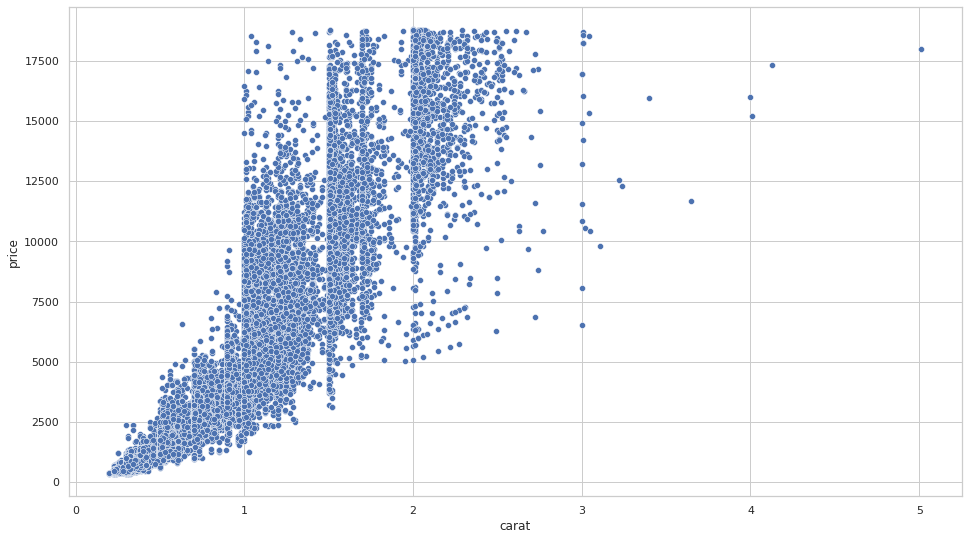

In [66]:
sns.scatterplot(x=data.carat,y=data.price);

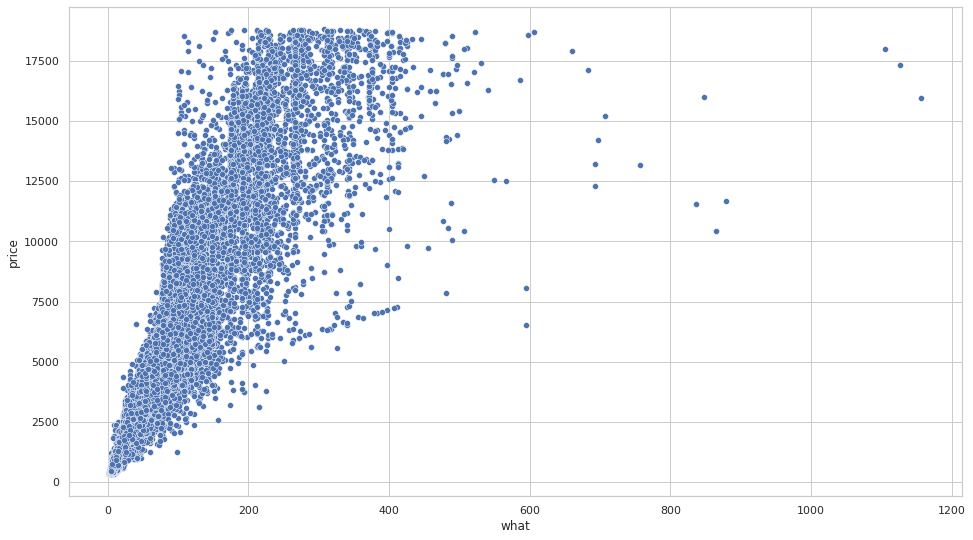

In [60]:
sns.scatterplot(x=data.what,y=data.price);

In [62]:
data.corr().price

carat              0.921128
cut               -0.052115
color             -0.173896
clarity           -0.142408
depth             -0.015052
table              0.127691
price              1.000000
price_per_carat    0.913220
quality            0.905530
what               0.910134
Name: price, dtype: float64

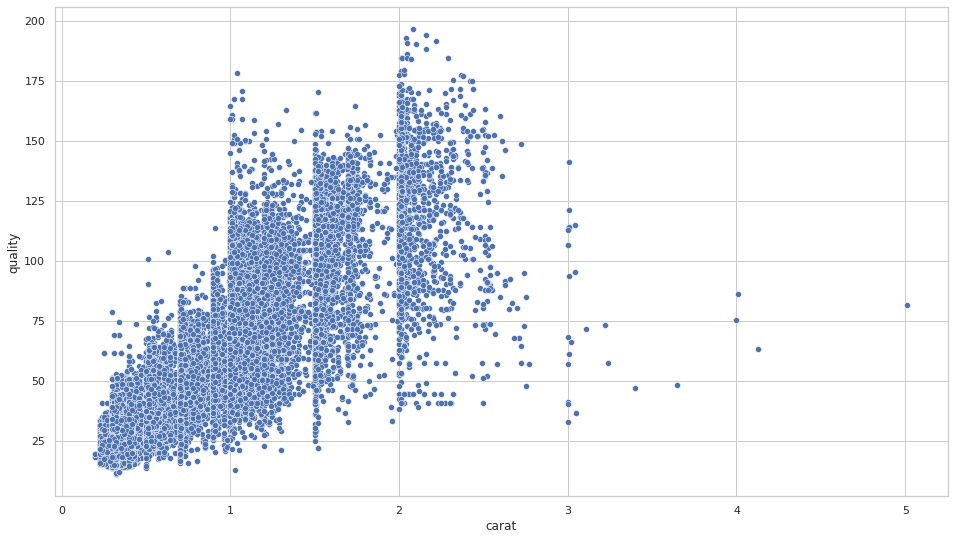

In [67]:
sns.scatterplot(x=data.carat,y=data.quality);

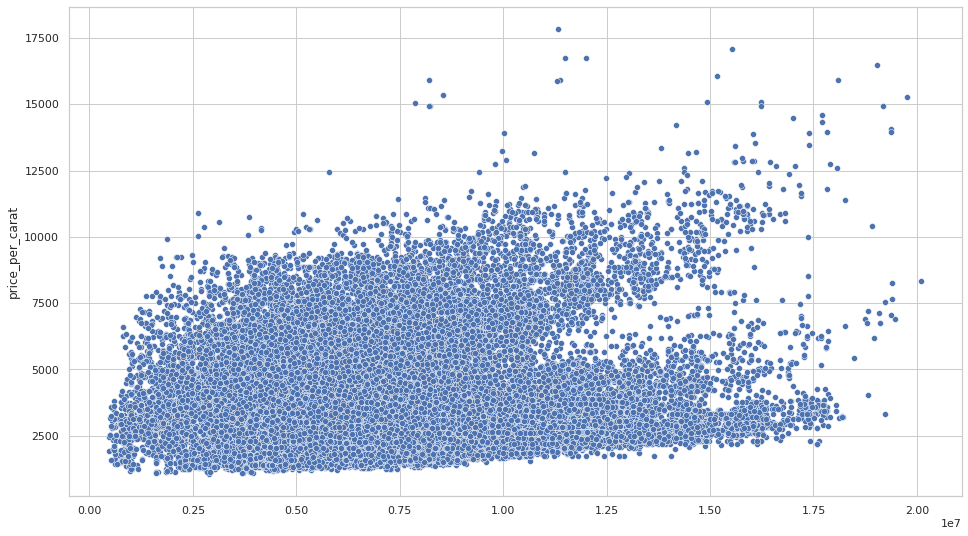

In [83]:
sns.scatterplot(x=data.color*data.cut*data.clarity*data.depth*data.table,y=data.price_per_carat);

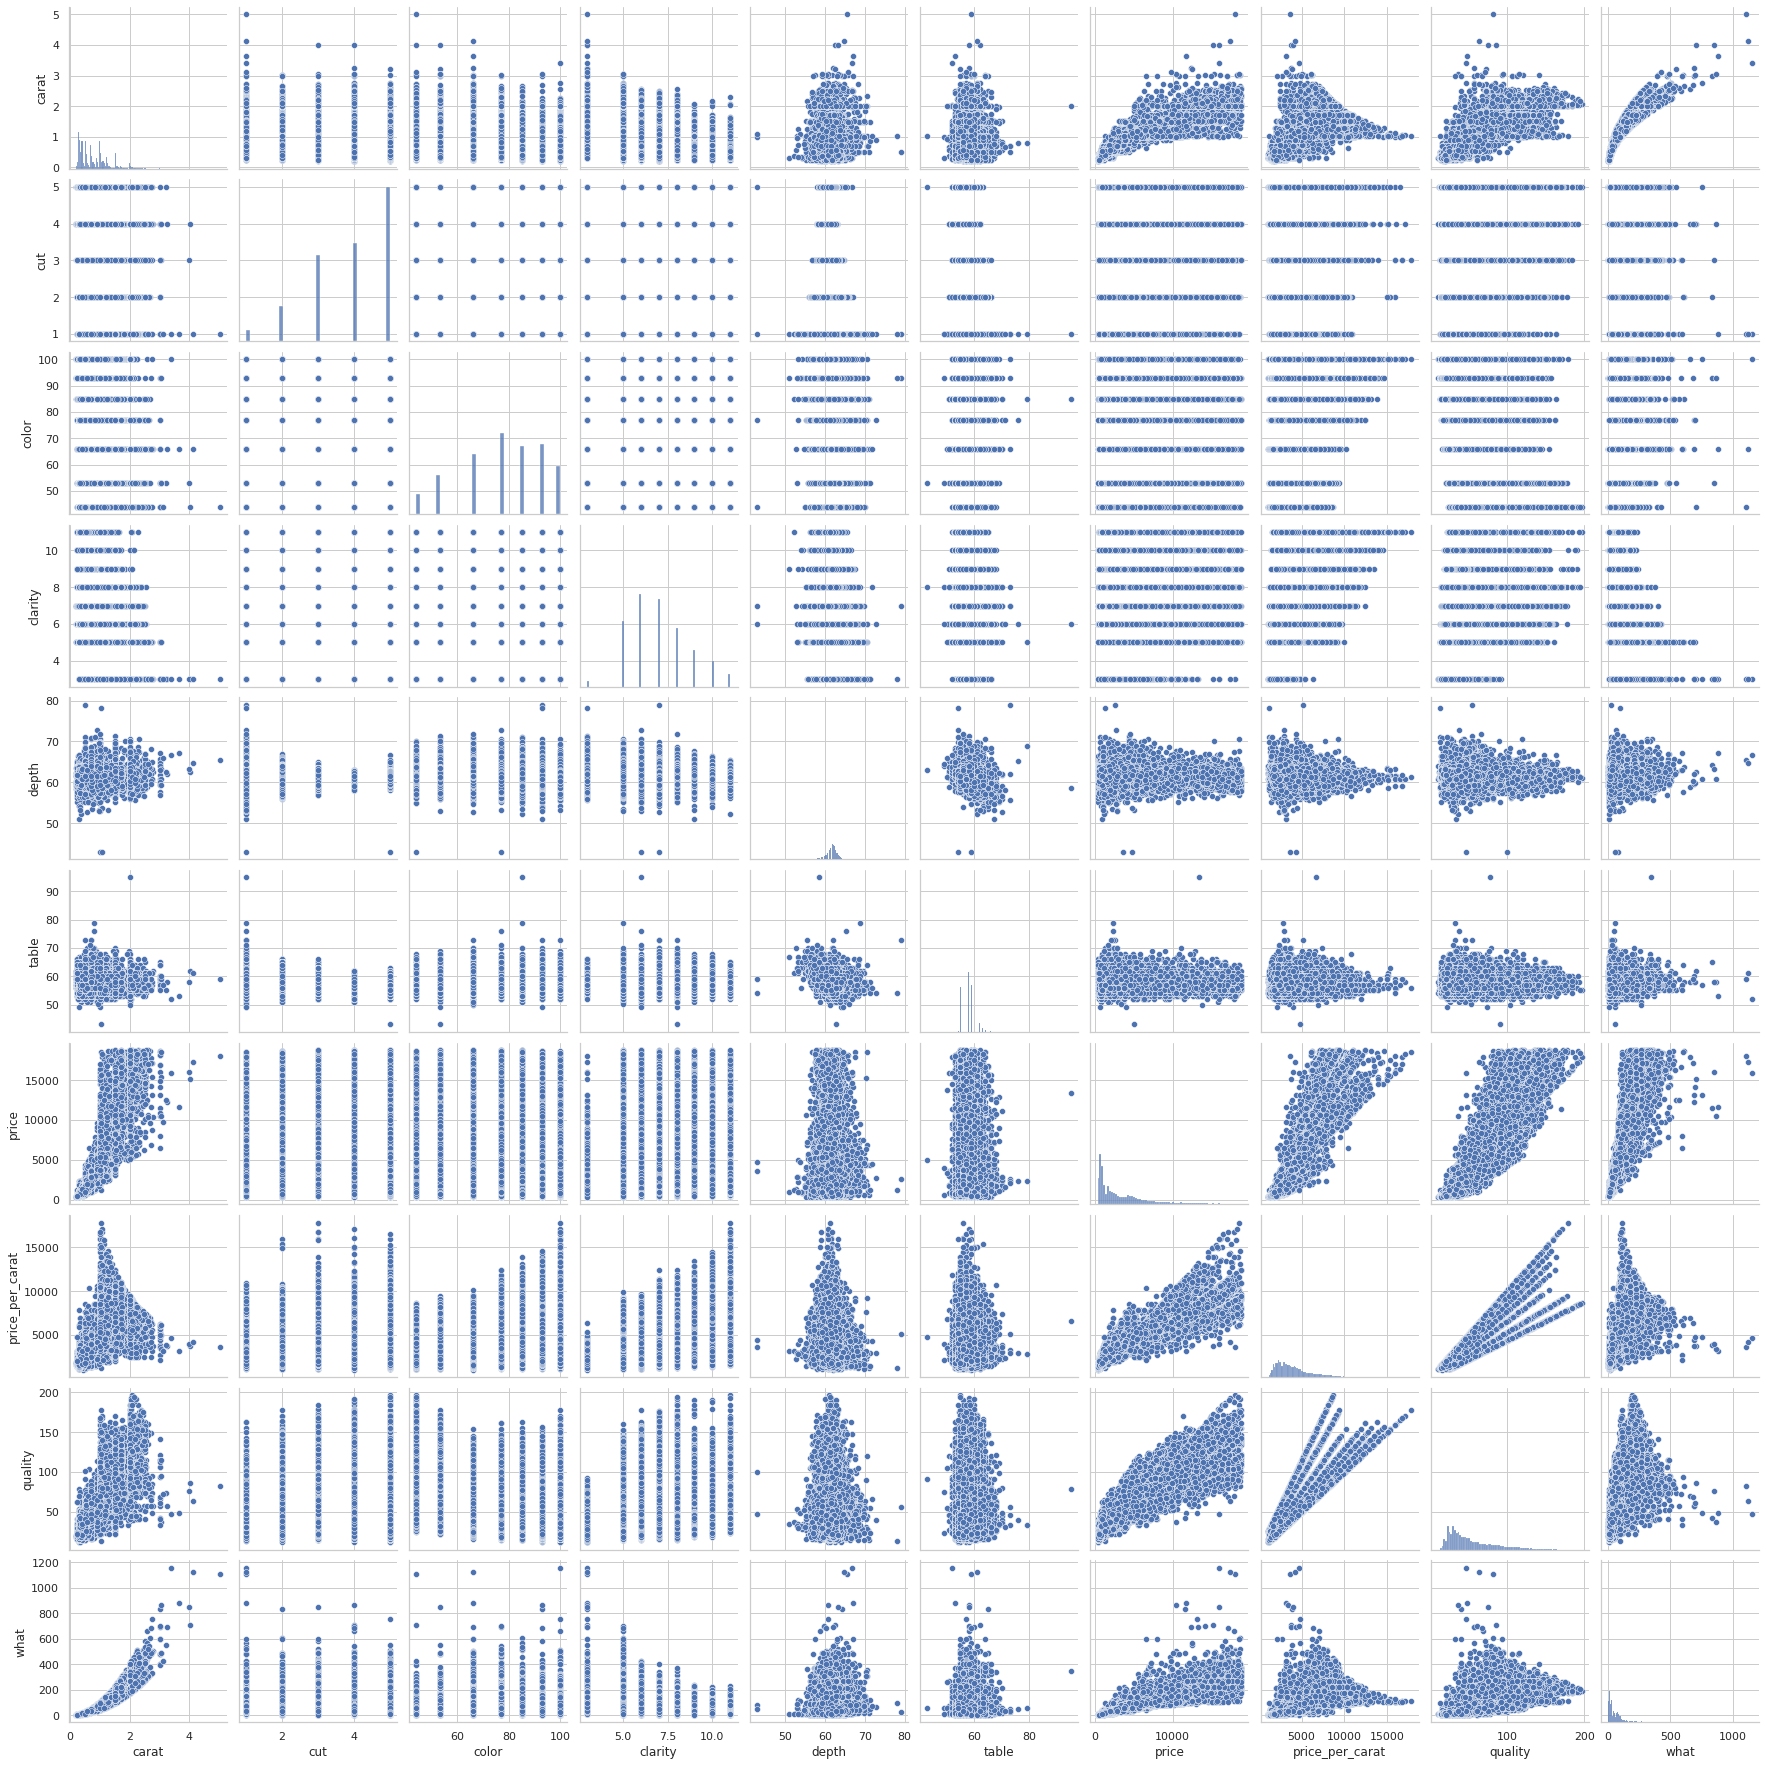

In [69]:
sns.pairplot(data)

In [70]:
import statsmodels.formula.api as smf

In [71]:
results = smf.ols("price ~ carat + color + what", data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 9.037e+04
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:30:44   Log-Likelihood:            -3.5159e+05
No. Observations:               40455   AIC:                         7.032e+05
Df Residuals:                   40451   BIC:                         7.032e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2454.0351     58.975    -41.612      0.000   -2569.627   -2338.443
carat       5349.5214     51.017    104.857      0.000    5249.526    5449.516
color         12.4882      0.548     22.778      0.000      11.414      13.563
what          18.3245      0.328     55.899      0.000      17.682      18.967
==============================================================================
Omnibus:                    10440.863   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           762438.398
Skew:                          -0.235   Prob(JB):                         0.00
Kurtosis:                      24.263   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
data.sample()

,carat,cut,color,clarity,depth,table,price,price_per_carat,quality,what
25007,1.64,4,85,6,61.3,58.0,12821,7817.682927,91.97274,228.616


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [80]:
y=data.price
X=data.drop(columns=["carat", "cut", "color", "clarity", "depth", "table", "price", "price_per_carat", "quality"])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [81]:
for i in range(12,25):
    forest = RandomForestRegressor(max_depth=i)
    forest.fit(X_train,y_train)
    y_pred = forest.predict(X_test)
    print(f"Max Depth = {i}  -->  RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

Max Depth = 12  -->  RMSE:  1250.4424943668705
Max Depth = 13  -->  RMSE:  1253.2830540217835
Max Depth = 14  -->  RMSE:  1250.4073467854453
Max Depth = 15  -->  RMSE:  1253.7730542410025
Max Depth = 16  -->  RMSE:  1258.8061044141111
Max Depth = 17  -->  RMSE:  1253.3739960005591
Max Depth = 18  -->  RMSE:  1255.947858214654
Max Depth = 19  -->  RMSE:  1258.1699646299953
Max Depth = 20  -->  RMSE:  1259.415227069389
Max Depth = 21  -->  RMSE:  1262.0388500197535
Max Depth = 22  -->  RMSE:  1264.1116767867718
Max Depth = 23  -->  RMSE:  1258.8786203443503
Max Depth = 24  -->  RMSE:  1260.2659789669365
